In [1]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Path dataset split
output_base_path_aksarawa = r'D:\Proyek Aksara\Datasets_split_aksarawa'

# Load ResNet50 as base model (without the classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification
predictions = Dense(20, activation='softmax')(x)  # 20 output classes

# Combine base model and new classification layer
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 293s 3us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 134, 134,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 64, 64,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 64, 64,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 64, 64,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 66, 66,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 32, 32,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 32, 32,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 32, 32,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 32, 32,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 32, 32,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 32, 32,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 32, 32,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 32, 32,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 32, 32,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 32, 32,    │      1,024 │ conv2_block1_3_c

 Total params: 23,628,692 (90.14 MB)

 Trainable params: 40,980 (160.08 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [2]:
# ImageDataGenerator for augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Path dataset split
train_dir = os.path.join(output_base_path_aksarawa, 'train')
test_dir = os.path.join(output_base_path_aksarawa, 'test')

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

Found 6988 images belonging to 20 classes.
Found 3007 images belonging to 20 classes.


In [3]:
# List class names
classes = sorted(os.listdir(train_dir))
print("Kelas yang ada dalam dataset:")
for idx, cls in enumerate(classes):
    print(f"{idx + 1}. {cls}")

Kelas yang ada dalam dataset:
1. ba
2. ca
3. da
4. dha
5. ga
6. ha
7. ja
8. ka
9. la
10. ma
11. na
12. nga
13. nya
14. pa
15. ra
16. sa
17. ta
18. tha
19. wa
20. ya


In [4]:
# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)



Epoch 1/20


c:\Users\p\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


219/219 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.0575 - loss: 2.9786 - val_accuracy: 0.0615 - val_loss: 2.9180
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.0733 - loss: 2.9246 - val_accuracy: 0.0748 - val_loss: 2.9042
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.0770 - loss: 2.9139 - val_accuracy: 0.0831 - val_loss: 2.8882
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.0909 - loss: 2.8938 - val_accuracy: 0.0934 - val_loss: 2.8747
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 596s 3s/step - accuracy: 0.0897 - loss: 2.8917 - val_accuracy: 0.1383 - val_loss: 2.8631
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.0998 - loss: 2.8846 - val_accuracy: 0.1201 - val_loss: 2.8546
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 583s 3s/step - accuracy: 0.0986 - loss: 2.8762 - val_accuracy: 0.1543 - val_loss: 2.8396
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 561s 3s/step - accuracy: 0.1076 - loss: 2.8752 - val_accuracy: 0.098

In [7]:
final_accuracy = history.history['val_accuracy'][-1]
print(f'Akurasi akhir model: {final_accuracy}')


Akurasi akhir model: 0.15596941113471985


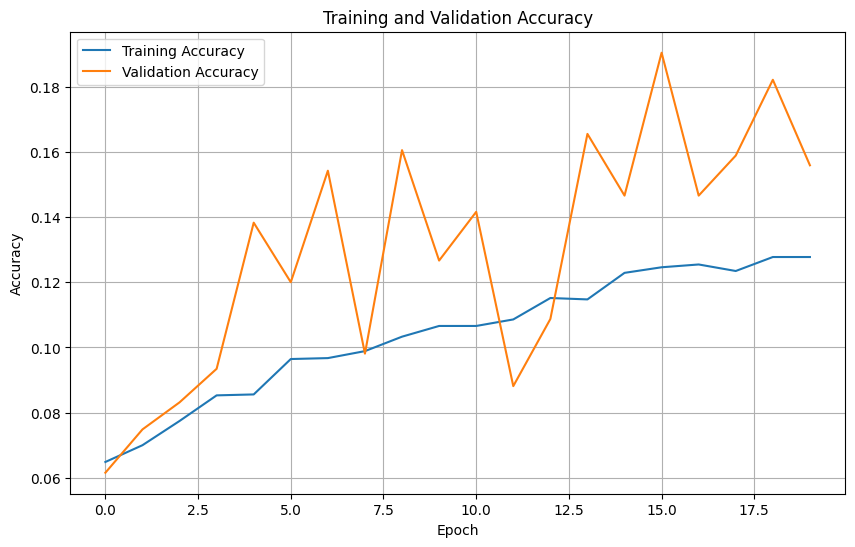

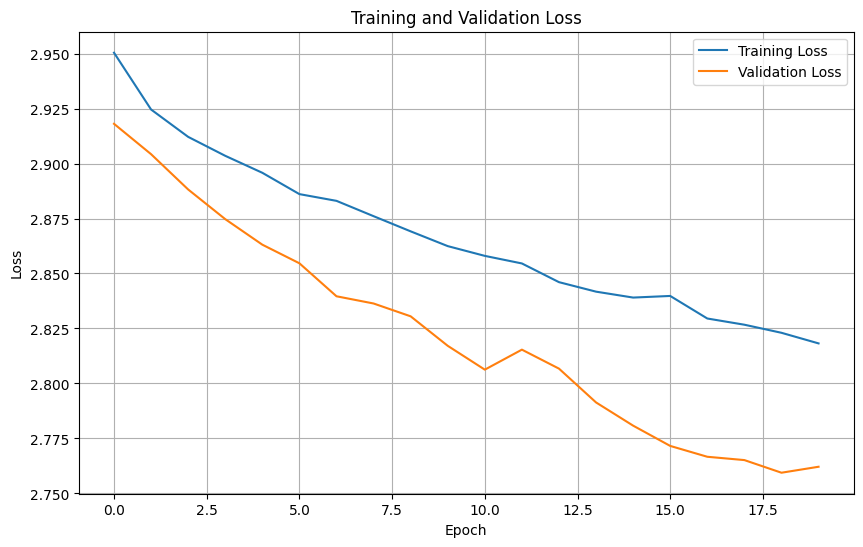

In [8]:
import matplotlib.pyplot as plt

# Plotting akurasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Save the model
model.save('aksaraJawaResnet_classifier_model.h5')



In [6]:
# Load the model for inference
model = load_model('aksaraJawaResnet_classifier_model.h5')

# Class labels
class_labels = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    print(f"Raw predictions: {predictions}")  # Debug: Print raw predictions
    predicted_class_idx = np.argmax(predictions)
    print(f"Predicted class index: {predicted_class_idx}")  # Debug: Print predicted class index
    predicted_class = class_labels[predicted_class_idx]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        print(f"Uploaded file: {uploaded_file}")  # Debug: Print uploaded file information
        content = uploaded_file['content']  # Access the content directly
        
        try:
            # Convert content to image array
            img = load_img(io.BytesIO(content), target_size=(128, 128))
            img_array = img_to_array(img)
            
            # Classify the uploaded image
            predicted_class = classify_image(img_array)
            
            # Display the uploaded image and classification result
            display_img = Image(value=content, format='png', width=300, height=300)
            result_label = Label(f'Classified as: {predicted_class}')
            display(VBox([display_img, result_label]))
        
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))
